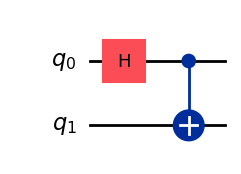

In [1]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

qc.draw(output='mpl')

In [2]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]

In [3]:
# Step 2: Optimize 

In [4]:
# Step 3: Execute on backend

In [5]:
from qiskit_aer.primitives import Estimator

In [6]:
estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

In [7]:
job.result()

EstimatorResult(values=array([ 1.        , -0.01757812, -0.01757812,  1.        ,  0.        ,
        0.        ]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0035229, 'sample_measure_time': 0.0008052, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 16122, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 10, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9996910095214844, 'simulator_metadata': [{'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0035229, 'sample_measure_time': 0.0008

In [8]:
# Step 4: Postprocessing and plotting

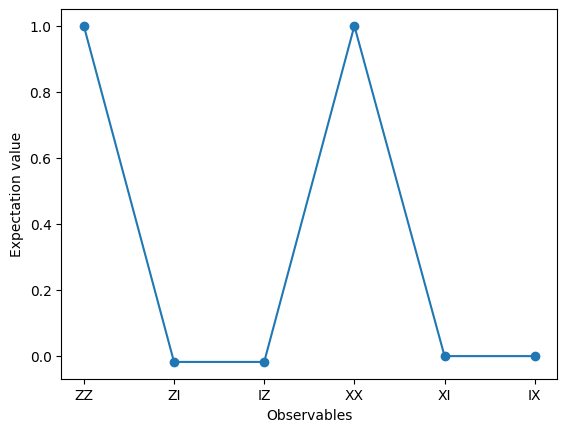

(6,)

In [25]:
import matplotlib.pyplot as plt
data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']

values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()

values.shape


In [27]:
# hello world, n qubit GHZ state 

In [28]:
# Step 1: map the problem to circuits and operators

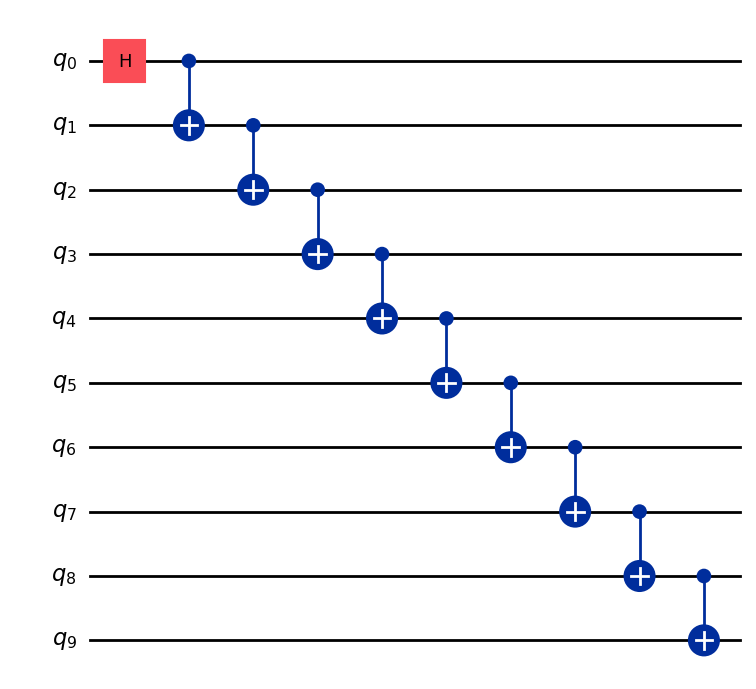

In [30]:
def get_qc_for_n_qubit_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    
    return qc

n = 10
qc = get_qc_for_n_qubit_state(n)

qc.draw(output='mpl')

In [ ]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z' + 'I' * i + 'Z' + 'I' * (n-2-i) for i in range(n-1)]